In [1]:
import numpy as np
import matplotlib.pyplot as plt


**Map size at z=0.47: 119.61 arcmin in 1000 pixels 0.11960560198426018 arcmin/Pixel**

# $\Delta \Sigma$ & Cumulative Profile Ratios (normalized by f_b)


In [2]:
indices = np.arange(1024)
ksz_sims = []
dS_sims = []
ds_ksz_sims = []
fb_sims = []
params_matrix = np.load("camels_params_matrix.npy")

number_density = [5.4e-4, 2.8e-4, 1e-4]
abundances = [int(5.4e-4*50**3), int(2.8e-4*50**3), int(1e-4*50**3)] #DESI, CMASS samples, minimum
dS_abundance =  ([],[],[])
dS_gas_abundance = ([],[],[])
cumulative_gas_abundance = ([],[],[])
cumulative_baryon_abundance = ([],[],[])
cumulative_total_abundance = ([],[],[])


for i, id in enumerate(indices):
    Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{id}/data/'+ f"Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz")
    if i == 0:
        print(Henry_profiles_sim.keys())
        print(Henry_profiles_sim['profile_names'])
    r_bins =  Henry_profiles_sim['r_bins']
    fb = params_matrix[id,6]/params_matrix[id,0]
    fb_sims.append(fb)

    ## delta Sigma
    profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][0]

    ## varying abundance
    dS_abundance[0].extend((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[0]])
    dS_abundance[1].extend((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[1]])
    dS_abundance[2].extend((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[2]])
    dS_gas_abundance[0].extend((profiles_g)[:abundances[0]])
    dS_gas_abundance[1].extend((profiles_g)[:abundances[1]])
    dS_gas_abundance[2].extend((profiles_g)[:abundances[2]])

    ## cumulative profile
    profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][2]

    ## varying abundance
    cumulative_gas_abundance[0].extend((profiles_g)[:abundances[0]])
    cumulative_gas_abundance[1].extend((profiles_g)[:abundances[1]])
    cumulative_gas_abundance[2].extend((profiles_g)[:abundances[2]])
    cumulative_total_abundance[0].extend((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[0]])
    cumulative_total_abundance[1].extend((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[1]])
    cumulative_total_abundance[2].extend((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[2]])   
    cumulative_baryon_abundance[0].extend((profiles_g+profiles_s+profiles_bh)[:abundances[0]])
    cumulative_baryon_abundance[1].extend((profiles_g+profiles_s+profiles_bh)[:abundances[1]])
    cumulative_baryon_abundance[2].extend((profiles_g+profiles_s+profiles_bh)[:abundances[2]])


KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_0/data/Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz' with keys: profiles, profile_names, r_bins, r_mids_array, m_halos_range)
['$\\Delta \\Sigma$' 'CAP' '2D Cumulative Mass']


In [ ]:
median_dS_gas_abundance_ratio = np.empty([3,len(r_bins)])
yerr_dS_gas_abundance_ratio = []
median_cumulative_gas_abundance_ratio = np.empty([3,len(r_bins)])
yerr_cumulative_gas_abundance_ratio = []
median_cumulative_baryon_abundance_ratio = np.empty([3,len(r_bins)])
yerr_cumulative_baryon_abundance_ratio = []


for i, (dS_gas, dS_total, cumulative_gas, cumulative_baryon, cumulative_total, fb) in enumerate(zip(dS_gas_abundance, dS_abundance, cumulative_gas_abundance, cumulative_baryon_abundance, cumulative_total_abundance, fb_sims)):

    dS_gas = np.array(dS_gas)
    dS_total = np.array(dS_total)
    cumulative_gas = np.array(cumulative_gas)
    cumulative_baryon = np.array(cumulative_baryon)
    cumulative_total = np.array(cumulative_total)
    
    #delta Sigma ratio
    ratio = dS_gas / dS_total / fb  #normalize by fb
    upper = np.quantile(ratio, 0.25, axis=0)
    lower = np.quantile(ratio, 0.75, axis=0)
    median_dS_ratio = np.median(ratio, axis=0)
    yerr_lower = np.abs(median_dS_ratio - lower)
    yerr_upper =  np.abs(upper - median_dS_ratio)


    yerr_dS_gas_abundance_ratio.append([yerr_lower, yerr_upper])
    median_dS_gas_abundance_ratio[i] = median_dS_ratio

    #cumulative gas fraction
    cumulative_gas_fraction = cumulative_gas / cumulative_total / fb
    upper = np.quantile(cumulative_gas_fraction, 0.25, axis=0)
    lower = np.quantile(cumulative_gas_fraction, 0.75, axis=0)
    median_cumulative_gas_fraction = np.median(cumulative_gas_fraction, axis=0)
    yerr_lower = np.abs(median_cumulative_gas_fraction - lower)
    yerr_upper =  np.abs(upper - median_cumulative_gas_fraction)

    yerr_cumulative_gas_abundance_ratio.append([yerr_lower, yerr_upper])
    median_cumulative_gas_abundance_ratio[i] = median_cumulative_gas_fraction

    #cumulative baryon fraction
    cumulative_baryon_fraction = cumulative_baryon / cumulative_total / fb
    upper = np.quantile(cumulative_baryon_fraction, 0.25, axis=0)
    lower = np.quantile(cumulative_baryon_fraction, 0.75, axis=0)
    median_cumulative_baryon_fraction = np.median(cumulative_baryon_fraction, axis=0)
    yerr_lower = np.abs(median_cumulative_baryon_fraction - lower)
    yerr_upper =  np.abs(upper - median_cumulative_baryon_fraction) 
    yerr_cumulative_baryon_abundance_ratio.append([yerr_lower, yerr_upper])
    median_cumulative_baryon_abundance_ratio[i] = median_cumulative_baryon_fraction




print(median_dS_gas_abundance_ratio.shape)

(3, 21)


Using nPixels=1000 for arcmin/pixel of 0.127


/tmp/ipykernel_2340690/2923270544.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_2340690/2923270544.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


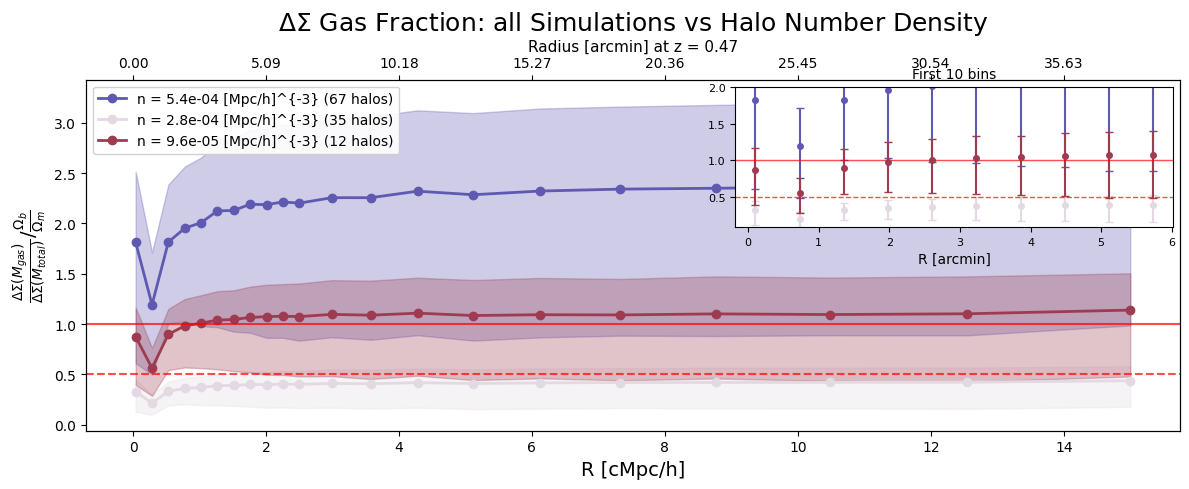

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
sys.path.append('../')
from analysis.ksz_utils import *
import matplotlib.cm as cm
import matplotlib.colors as colors

k = KSZSimulator(0)
AngDis = k.AngDist(k.z) 

# Create colormap based on number density (darker = higher density)
densities = np.array([abundances[i]/50**3 for i in range(3)])
# Use hot colormap and sample at evenly spaced positions
colourmap = cm.twilight_shifted
colours = colourmap(np.linspace(0.2, 0.8, 3))

fig, ax1 = plt.subplots(figsize=(12, 5))
# Main plot - all data
for i in range(3):
    color = colours[i]
    # Plot with fill_between for uncertainty
    lower = median_dS_gas_abundance_ratio[i] - yerr_dS_gas_abundance_ratio[i][0]
    upper = median_dS_gas_abundance_ratio[i] + yerr_dS_gas_abundance_ratio[i][1]
    ax1.plot(r_bins, median_dS_gas_abundance_ratio[i], 'o-', linewidth=2, markersize=6, color=color,
             label=f'n = {number_density[i]:.1e} [Mpc/h]^{{-3}} ({abundances[i]} halos)')
    ax1.fill_between(r_bins, lower, upper, alpha=0.3, color=color)

ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$\frac{\Delta \Sigma (M_{gas})}{\Delta \Sigma (M_{total})}/\frac{\Omega_{b}}{\Omega_{m}}$', size=14)
ax1.set_title(r'$\Delta \Sigma$ Gas Fraction: all Simulations vs Halo Number Density', size=18)

# Add horizontal reference lines
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.axhline(y=1.0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)

# Create inset for zoomed view
ax2 = inset_axes(ax1, width="40%", height="40%", loc='upper right')
theta_rad = np.arctan(r_bins / AngDis)  # Calculate theta in radians from r_bins
theta_bins = np.degrees(theta_rad) * 60.  # Convert to arcminutes
# Zoomed subplot - first 10 bins with log y-axis
for i in range(3):
    color = colours[i]
    # Plot in inset
    lower = yerr_dS_gas_abundance_ratio[i][0][:10]
    upper = yerr_dS_gas_abundance_ratio[i][1][:10]
    ax2.errorbar(theta_bins[:10], median_dS_gas_abundance_ratio[i][:10], yerr=[lower, upper], 
                 fmt='o', capsize=3, capthick=1, linewidth=1.5, markersize=4, color=color)


# ax2.set_yscale('log')
ax2.set_ylim([.1,2])
ax2.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=1.0, color='red', linestyle='-', linewidth=1, alpha=0.7)
ax2.set_xlabel('R [arcmin]', size=10)
ax2.set_title('First 10 bins', size=10)
ax2.tick_params(labelsize=8)


ax3 = ax1.twiny()
# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
theta_rad = np.arctan(ax1.get_xticks() / AngDis)  # Calculate theta in radians from r_bins
theta = np.degrees(theta_rad) * 60.  # Convert to arcminutes
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)

ax1.legend(loc='upper left', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2340690/1473391909.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_2340690/1473391909.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


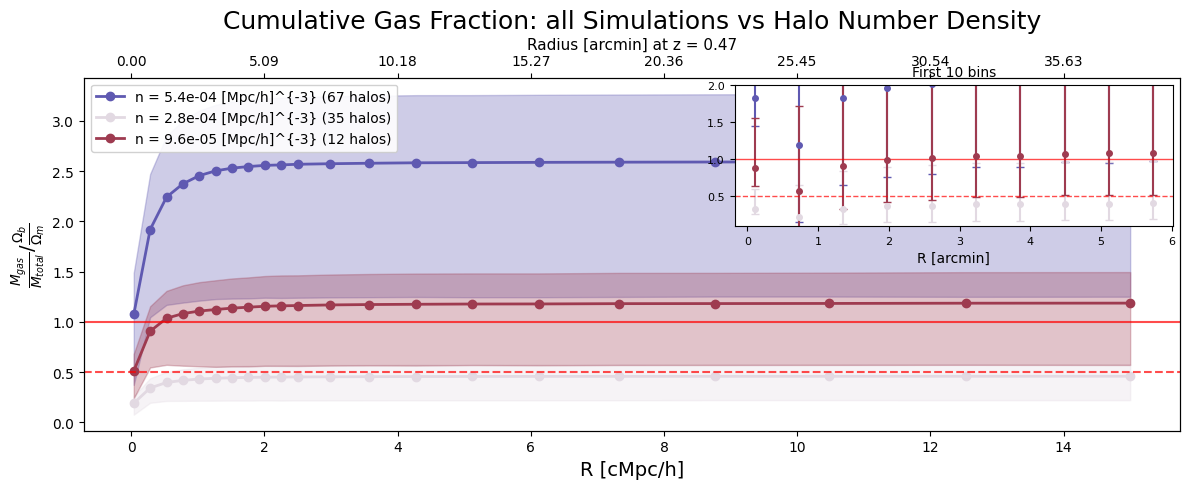

In [ ]:
# Plot 2: Cumulative Gas Abundance Ratio
fig, ax1 = plt.subplots(figsize=(12, 5))
# Main plot - all data
for i in range(3):
    color = colours[i]
    # Plot with fill_between for uncertainty
    lower = median_cumulative_gas_abundance_ratio[i] - yerr_cumulative_gas_abundance_ratio[i][0]
    upper = median_cumulative_gas_abundance_ratio[i] + yerr_cumulative_gas_abundance_ratio[i][1]
    ax1.plot(r_bins, median_cumulative_gas_abundance_ratio[i], 'o-', linewidth=2, markersize=6, color=color,
             label=f'n = {number_density[i]:.1e} [Mpc/h]^{{-3}} ({abundances[i]} halos)')
    ax1.fill_between(r_bins, lower, upper, alpha=0.3, color=color)

ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$\frac{M_{gas}}{M_{total}}/\frac{\Omega_{b}}{\Omega_{m}}$', size=14)
ax1.set_title(r'Cumulative Gas Fraction: all Simulations vs Halo Number Density', size=18)

# Add horizontal reference lines
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.axhline(y=1.0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)

# Create inset for zoomed view
ax2 = inset_axes(ax1, width="40%", height="40%", loc='upper right')
# Zoomed subplot - first 10 bins
for i in range(3):
    color = colours[i]
    # Plot in inset with fill_between
    lower = median_cumulative_gas_abundance_ratio[i][:10] - yerr_cumulative_gas_abundance_ratio[i][0][:10]
    upper = median_cumulative_gas_abundance_ratio[i][:10] + yerr_cumulative_gas_abundance_ratio[i][1][:10]
    ax2.errorbar(theta_bins[:10], median_dS_gas_abundance_ratio[i][:10], yerr=[lower, upper], 
                 fmt='o', capsize=3, capthick=1, linewidth=1.5, markersize=4, color=color)

ax2.set_ylim([.1,2])
ax2.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=1.0, color='red', linestyle='-', linewidth=1, alpha=0.7)
ax2.set_xlabel('R [arcmin]', size=10)
ax2.set_title('First 10 bins', size=10)
ax2.tick_params(labelsize=8)

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
theta_rad = np.arctan(ax1.get_xticks() / AngDis)
theta = np.degrees(theta_rad) * 60.
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)

ax1.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2340690/651183771.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_2340690/651183771.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


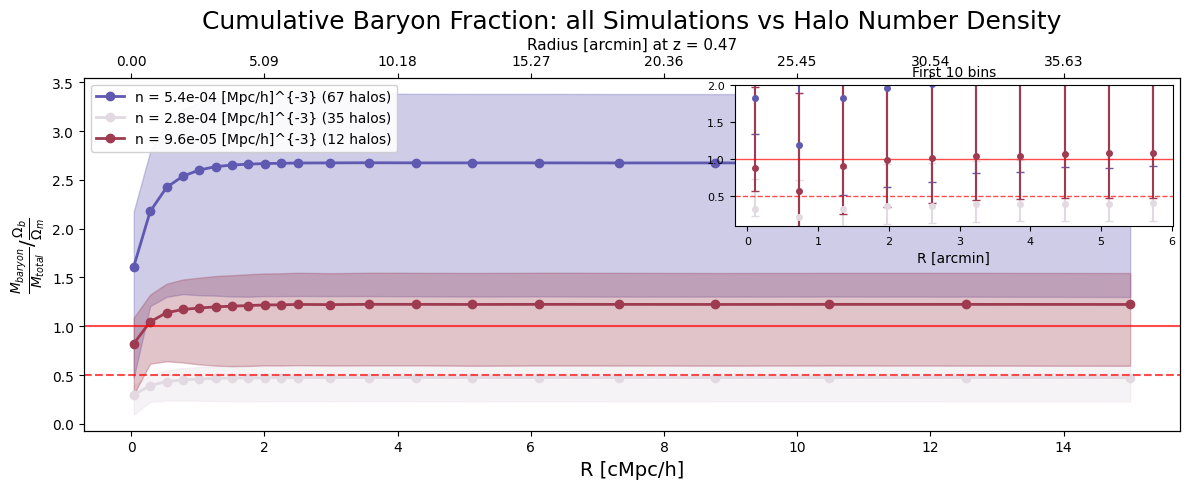

In [ ]:
# Plot 3: Cumulative Baryon Abundance Ratio
fig, ax1 = plt.subplots(figsize=(12, 5))
# Main plot - all data
for i in range(3):
    color = colours[i]
    # Plot with fill_between for uncertainty
    lower = median_cumulative_baryon_abundance_ratio[i] - yerr_cumulative_baryon_abundance_ratio[i][0]
    upper = median_cumulative_baryon_abundance_ratio[i] + yerr_cumulative_baryon_abundance_ratio[i][1]
    ax1.plot(r_bins, median_cumulative_baryon_abundance_ratio[i], 'o-', linewidth=2, markersize=6, color=color,
             label=f'n = {number_density[i]:.1e} [Mpc/h]^{{-3}} ({abundances[i]} halos)')
    ax1.fill_between(r_bins, lower, upper, alpha=0.3, color=color)

ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$\frac{M_{baryon}}{M_{total}}/\frac{\Omega_{b}}{\Omega_{m}}$', size=14)
ax1.set_title(r'Cumulative Baryon Fraction: all Simulations vs Halo Number Density', size=18)

# Add horizontal reference lines
ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.axhline(y=1.0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)

# Create inset for zoomed view
ax2 = inset_axes(ax1, width="40%", height="40%", loc='upper right')
# Zoomed subplot - first 10 bins
for i in range(3):
    color = colours[i]
    # Plot in inset with fill_between
    lower = median_cumulative_baryon_abundance_ratio[i][:10] - yerr_cumulative_baryon_abundance_ratio[i][0][:10]
    upper = median_cumulative_baryon_abundance_ratio[i][:10] + yerr_cumulative_baryon_abundance_ratio[i][1][:10]
    ax2.errorbar(theta_bins[:10], median_dS_gas_abundance_ratio[i][:10], yerr=[lower, upper], 
                 fmt='o', capsize=3, capthick=1, linewidth=1.5, markersize=4, color=color)

ax2.set_ylim([.1,2])
ax2.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.axhline(y=1.0, color='red', linestyle='-', linewidth=1, alpha=0.7)
ax2.set_xlabel('R [arcmin]', size=10)
ax2.set_title('First 10 bins', size=10)
ax2.tick_params(labelsize=8)

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
theta_rad = np.arctan(ax1.get_xticks() / AngDis)
theta = np.degrees(theta_rad) * 60.
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)

ax1.legend(loc='upper left', fontsize=10, framealpha=0.9)
plt.tight_layout()
plt.show()

# kSZ & $\Delta \Sigma$ Profiles

In [4]:

ksz_sims = np.load('raw_ksz_profiles_sims_halos.npy')
dS_sims = np.load('raw_delta_sigma_profiles_sims_halos.npy')
ds_ksz_sims = np.load('raw_delta_sigma_gas_profiles_sims_halos.npy')

r_bins = Henry_profiles_sim['r_bins']
upper = np.quantile(ksz_sims, 0.25, axis=0)
lower = np.quantile(ksz_sims, 0.75, axis=0)
median_ksz = np.median(ksz_sims, axis=0)
yerr_lower = np.abs(median_ksz - lower)
yerr_upper =  np.abs(upper - median_ksz)
yerr_ksz = [yerr_lower, yerr_upper]

upper = np.quantile(dS_sims, 0.25, axis=0)
lower = np.quantile(dS_sims, 0.75, axis=0)
median_dS = np.median(dS_sims, axis=0)
yerr_lower = np.abs(median_dS - lower)
yerr_upper =  np.abs(upper - median_dS)
yerr_dS = [yerr_lower, yerr_upper]

upper = np.quantile(ds_ksz_sims, 0.25, axis=0)
lower = np.quantile(ds_ksz_sims, 0.75, axis=0)
median_dS_gas = np.median(ds_ksz_sims, axis=0)
yerr_lower = np.abs(median_dS_gas - lower)
yerr_upper =  np.abs(upper - median_dS_gas)
yerr_dS_gas = [yerr_lower, yerr_upper]

Using nPixels=1000 for arcmin/pixel of 0.147


/tmp/ipykernel_788112/2512966528.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])


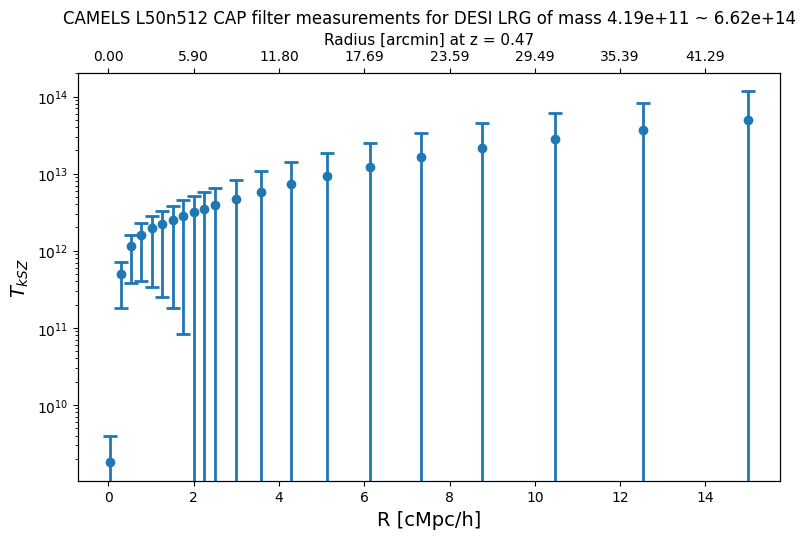

/tmp/ipykernel_788112/2512966528.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])


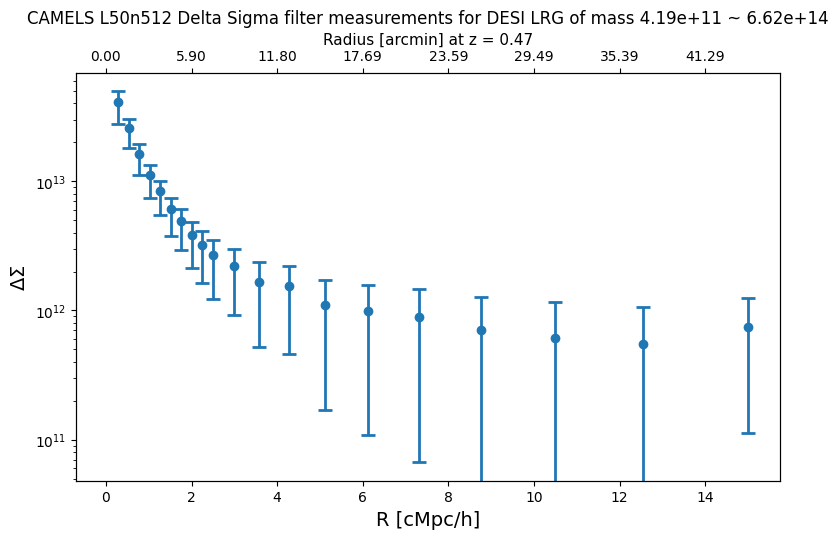

/tmp/ipykernel_788112/2512966528.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])


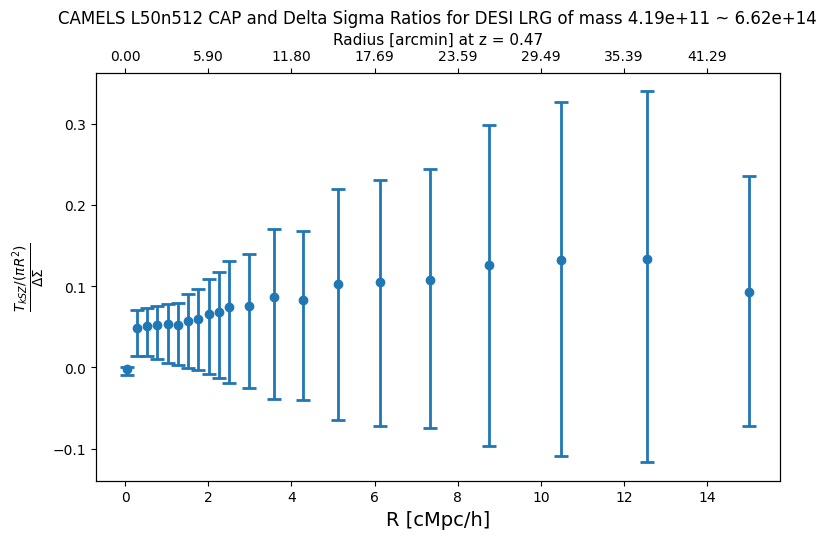

/tmp/ipykernel_788112/2512966528.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])


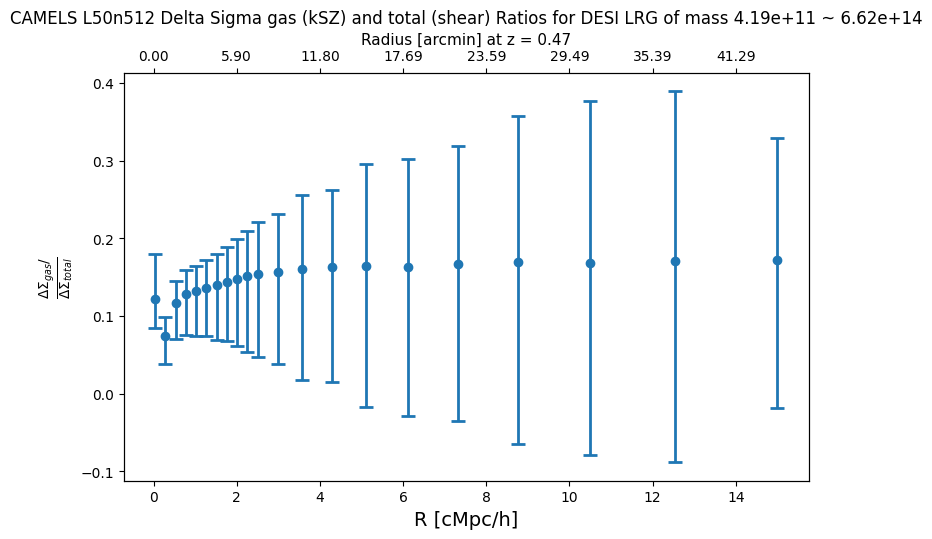

In [8]:
import sys
sys.path.append('../')
from analysis.ksz_utils import *

k = KSZSimulator(777)

fig, ax1 = plt.subplots(figsize=(8,5.5))
ax1.errorbar(r_bins, median_ksz, yerr=yerr_ksz, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)

ax1.set_yscale('log')
ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$T_{kSZ}$', size=14)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Calculate r_bins from theta
# Reverse the conversion: r_bins = AngDis * tan(theta_rad)
AngDis = k.AngDist(k.z) 
theta_rad = np.arctan(ax1.get_xticks() / AngDis)  # Calculate theta in radians from r_bins
theta = np.degrees(theta_rad) * 60.  # Convert to arcminutes

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)
plt.title('CAMELS L50n512 CAP filter measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
# plt.savefig()
plt.show()

fig, ax1 = plt.subplots(figsize=(8,5.5))
ax1.errorbar(r_bins, median_dS, yerr=yerr_dS, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)

ax1.set_yscale('log')
ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$\Delta \Sigma$', size=14)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)
plt.title('CAMELS L50n512 Delta Sigma filter measurements for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
# plt.savefig()
plt.show()

fig, ax1 = plt.subplots(figsize=(8,5.5))
# Calculate the ratio
ratio = median_ksz / (median_dS * np.pi *  r_bins**2)  # Normalize by area of annulus

# Calculate error propagation for the ratio
# For ratio = A/B, the relative error is sqrt((dA/A)^2 + (dB/B)^2)
rel_err_ksz_lower = yerr_ksz[0] / median_ksz
rel_err_ksz_upper = yerr_ksz[1] / median_ksz
rel_err_dS_lower = yerr_dS[0] / np.abs(median_dS)
rel_err_dS_upper = yerr_dS[1] / np.abs(median_dS)

# Combined relative errors
rel_err_ratio_lower = np.sqrt(rel_err_ksz_lower**2 + rel_err_dS_lower**2)
rel_err_ratio_upper = np.sqrt(rel_err_ksz_upper**2 + rel_err_dS_upper**2)

# Convert back to absolute errors
yerr_ratio = [rel_err_ratio_lower * np.abs(ratio), rel_err_ratio_upper * np.abs(ratio)]

ax1.errorbar(r_bins, ratio, yerr=yerr_ratio, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)

# ax1.set_yscale('log')
ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$\frac{T_{kSZ}/(\pi R^2)} {\Delta \Sigma}$', size=14)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)
plt.title('CAMELS L50n512 CAP and Delta Sigma Ratios for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
# plt.savefig()
plt.show()

fig, ax1 = plt.subplots(figsize=(8,5.5))
# Calculate the ratio
ratio = median_dS_gas / median_dS 

# Calculate error propagation for the ratio
# For ratio = A/B, the relative error is sqrt((dA/A)^2 + (dB/B)^2)
rel_err_ksz_lower = yerr_dS_gas[0] / median_dS_gas
rel_err_ksz_upper = yerr_dS_gas[1] / median_dS_gas
rel_err_dS_lower = yerr_dS[0] / np.abs(median_dS)
rel_err_dS_upper = yerr_dS[1] / np.abs(median_dS)

# Combined relative errors
rel_err_ratio_lower = np.sqrt(rel_err_ksz_lower**2 + rel_err_dS_lower**2)
rel_err_ratio_upper = np.sqrt(rel_err_ksz_upper**2 + rel_err_dS_upper**2)

# Convert back to absolute errors
yerr_ratio = [rel_err_ratio_lower * np.abs(ratio), rel_err_ratio_upper * np.abs(ratio)]

ax1.errorbar(r_bins, ratio, yerr=yerr_ratio, 
             fmt='o', capsize=5, capthick=2, linewidth=2, markersize=6)

# ax1.set_yscale('log')
ax1.set_xlabel(r'R [cMpc/h]', size=14)
ax1.set_ylabel(r'$\frac{\Delta \Sigma_{gas}/} {\Delta \Sigma_{total}}$', size=14)

# Create second x-axis on top for r_bins
ax3 = ax1.twiny()

# Set the same x-limits as the bottom axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticklabels([f'{r:.2f}' for r in theta])
ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)
plt.title('CAMELS L50n512 Delta Sigma gas (kSZ) and total (shear) Ratios for DESI LRG of mass 4.19e+11 ~ 6.62e+14')
plt.tight_layout()
# plt.savefig()
plt.show()

# Power Suppression (P_tot/P_dm)

In [1]:
import numpy as np
indices = np.arange(1024)
power_suppression = []
Px_Pdm_ratio=[]
Ptot_Pdm_ratio  = []
for i, id in enumerate(indices):
    Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{id}/data/'+ f"baryon_suppression_fields_nPixel512.npz")
    ## Cross-power/auto-power
    r =    Henry_profiles_sim['r']
    XX_dm_tot = Henry_profiles_sim['XX_dm_tot']
    X_dm = Henry_profiles_sim['X_dm']

    k =  Henry_profiles_sim['k']
    PX_dm_tot = Henry_profiles_sim['PX_dm_tot']
    P_dm = Henry_profiles_sim['P_dm']
    P_tot= Henry_profiles_sim['P_tot']
        
    power_suppression.append(XX_dm_tot / X_dm)
    Px_Pdm_ratio.append((PX_dm_tot*np.sqrt(P_tot)/np.sqrt(P_dm)))
    Ptot_Pdm_ratio.append((P_tot/P_dm))


np.save('corr_power_suppression_sims_halos.npy', np.array(power_suppression))
np.save('Px_Pdm_ratio_sims_halos.npy', np.array(Px_Pdm_ratio))
np.save('Ptot_Pdm_ratio_sims_halos.npy', np.array(Ptot_Pdm_ratio))


In [4]:
import numpy as np
power_suppression = np.load('corr_power_suppression_sims_halos.npy')
Px_Pdm_ratio = np.load('Px_Pdm_ratio_sims_halos.npy')
Ptot_Pdm_ratio = np.load('Ptot_Pdm_ratio_sims_halos.npy')
Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_0/data/'+ f"baryon_suppression_fields_nPixel512.npz")
r =    Henry_profiles_sim['r']
k =  Henry_profiles_sim['k']

upper = np.quantile(power_suppression, 0.25, axis=0)
lower = np.quantile(power_suppression, 0.75, axis=0)
median_corr = np.median(power_suppression, axis=0)
yerr_lower = np.abs(median_corr - lower)
yerr_upper =  np.abs(upper - median_corr)
yerr_corr = [yerr_lower, yerr_upper]

upper = np.quantile(Px_Pdm_ratio, 0.25, axis=0)
lower = np.quantile(Px_Pdm_ratio, 0.75, axis=0)
median_Pk = np.median(Px_Pdm_ratio, axis=0)
yerr_lower = np.abs(median_Pk - lower)
yerr_upper =  np.abs(upper - median_Pk)
yerr_Pk = [yerr_lower, yerr_upper]


upper = np.quantile(Ptot_Pdm_ratio, 0.25, axis=0)
lower = np.quantile(Ptot_Pdm_ratio, 0.75, axis=0)
median_Pk_tot_dm = np.median(Ptot_Pdm_ratio, axis=0)
yerr_lower = np.abs(median_Pk_tot_dm - lower)
yerr_upper =  np.abs(upper - median_Pk_tot_dm)
yerr_Pk_tot_dm = [yerr_lower, yerr_upper]



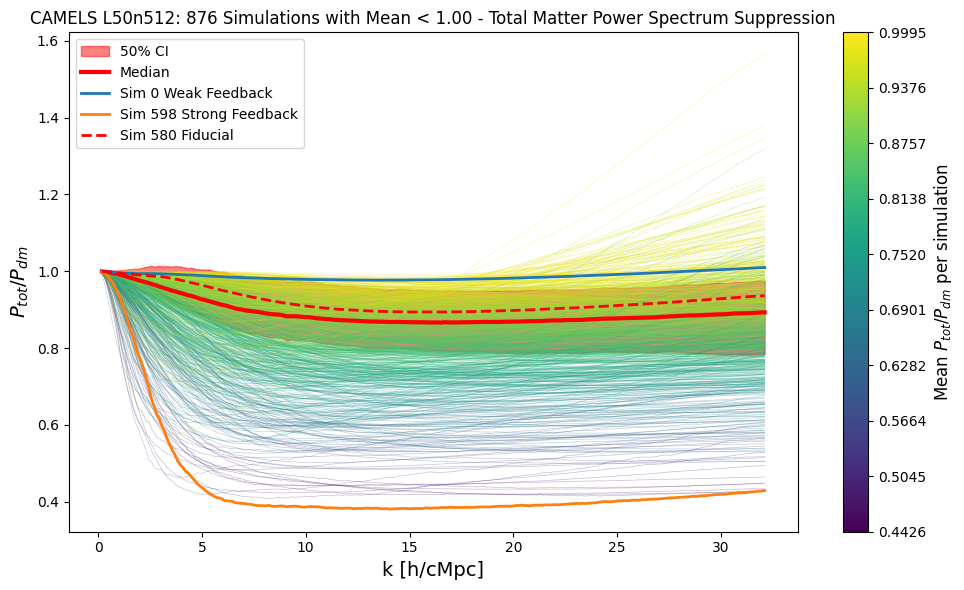

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a colormap for the simulations
import matplotlib.cm as cm
import matplotlib.colors as colors

# Calculate mean value for each simulation across k-axis for colorbar
mean_values = np.mean(Ptot_Pdm_ratio, axis=1) #(1024, 255)

# Filter simulations where mean value is < 1.00
mask_sims = mean_values < 1.00
filtered_Ptot_Pdm_ratio = Ptot_Pdm_ratio[mask_sims]
filtered_mean_values = mean_values[mask_sims]

# Normalize based on the range of filtered mean values
norm = colors.Normalize(vmin=np.min(filtered_mean_values), vmax=np.max(filtered_mean_values))
cmap = cm.viridis

# Plot each filtered simulation with a different color based on its mean value
for i, sim_data in enumerate(filtered_Ptot_Pdm_ratio):
    color = cmap(norm(filtered_mean_values[i]))
    ax1.plot(k, sim_data, alpha=0.3, linewidth=0.5, color=color)

# Plot the median with error bars on top
ax1.fill_between(k, median_Pk_tot_dm - yerr_Pk_tot_dm[0], median_Pk_tot_dm + yerr_Pk_tot_dm[1], 
                 alpha=0.5, color='red', label='50% CI')
ax1.plot(k, median_Pk_tot_dm, linewidth=3, color='red', label='Median')
ax1.plot(k, Ptot_Pdm_ratio[0], linewidth=2, label='Sim 0 Weak Feedback')
ax1.plot(k, Ptot_Pdm_ratio[598], linewidth=2, label='Sim 598 Strong Feedback')
ax1.plot(k, Ptot_Pdm_ratio[580], linewidth=2, color='r', ls='--', label='Sim 580 Fiducial')


ax1.set_xlabel(r'k [h/cMpc]', size=14)
ax1.set_ylabel(r'$P_{tot}/P_{dm}$', size=14)
ax1.set_title(f'CAMELS L50n512: {len(filtered_Ptot_Pdm_ratio)} Simulations with Mean < 1.00 - Total Matter Power Spectrum Suppression')
# Add colorbar with filtered mean values
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(filtered_mean_values)
cbar = plt.colorbar(sm, ax=ax1, ticks=np.linspace(np.min(filtered_mean_values), np.max(filtered_mean_values), 10))
cbar.set_label('Mean $P_{tot}/P_{dm}$ per simulation', size=12)

ax1.legend()
plt.tight_layout()
plt.show()

In [10]:

# Find the index of the minimum value in the entire array
min_index_filtered = np.unravel_index(np.argmin(filtered_Ptot_Pdm_ratio), filtered_Ptot_Pdm_ratio.shape)
# Convert filtered index back to original array index
original_indices = np.where(mask_sims)[0]
min_index = (original_indices[min_index_filtered[0]], min_index_filtered[1])
print(f"Index of minimum value in original array: {min_index}")
print(f"Minimum value: {filtered_Ptot_Pdm_ratio[min_index_filtered]}")

max_index_filtered = np.unravel_index(np.argmax(filtered_Ptot_Pdm_ratio.mean(axis=0)), filtered_Ptot_Pdm_ratio.shape)
max_index = (original_indices[max_index_filtered[0]], max_index_filtered[1])

print(f"Index of maximum value: {max_index}")
print(f"Maximum value: {filtered_Ptot_Pdm_ratio[max_index]}")


Index of minimum value in original array: (np.int64(598), np.int64(110))
Minimum value: 0.38114770956500477
Index of maximum value: (np.int64(0), np.int64(0))
Maximum value: 0.9998945761991095


# Strong & Weak Feedback models
### Map size at z=0.46777096651494054: 119.61 arcmin in 1000 pixels 0.11960560198426018 arcmin/Pixel


In [1]:
import numpy as np
import matplotlib.pyplot as plt

indices = [0, 598, 580]
ksz_sims = []
dS_sims = []
ds_ksz_sims = []
fb_sims = []
params_matrix = np.load("camels_params_matrix.npy")

number_density = [5.4e-4, 2.8e-4, 1e-4]
abundances = [int(5.4e-4*50**3), int(2.8e-4*50**3), int(1e-4*50**3)] #DESI, CMASS samples, minimum
dS_abundance =  ([],[],[])
dS_gas_abundance = ([],[],[])
cumulative_gas_abundance = ([],[],[])
cumulative_baryon_abundance = ([],[],[])
cumulative_total_abundance = ([],[],[])


for i, id in enumerate(indices):
    Henry_profiles_sim =  np.load(f'/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_{id}/data/'+ f"Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz")
    if i == 0:
        print(Henry_profiles_sim.keys())
        print(Henry_profiles_sim['profile_names'])
    r_bins =  Henry_profiles_sim['r_bins']
    fb = params_matrix[id,6]/params_matrix[id,0]
    fb_sims.append(fb)

    ## delta Sigma
    profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][0]
    ## varying abundance
    dS_abundance[0].append((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[0]])
    dS_abundance[1].append((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[1]])
    dS_abundance[2].append((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[2]])
    dS_gas_abundance[0].append((profiles_g)[:abundances[0]])
    dS_gas_abundance[1].append((profiles_g)[:abundances[1]])
    dS_gas_abundance[2].append((profiles_g)[:abundances[2]])

    ## cumulative profile
    profiles_g, profiles_m, profiles_s, profiles_bh = Henry_profiles_sim['profiles'][2]

    ## varying abundance
    cumulative_gas_abundance[0].append((profiles_g)[:abundances[0]])
    cumulative_gas_abundance[1].append((profiles_g)[:abundances[1]])
    cumulative_gas_abundance[2].append((profiles_g)[:abundances[2]])
    cumulative_total_abundance[0].append((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[0]])
    cumulative_total_abundance[1].append((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[1]])
    cumulative_total_abundance[2].append((profiles_g+profiles_m+profiles_s+profiles_bh)[:abundances[2]])   
    cumulative_baryon_abundance[0].append((profiles_g+profiles_s+profiles_bh)[:abundances[0]])
    cumulative_baryon_abundance[1].append((profiles_g+profiles_s+profiles_bh)[:abundances[1]])
    cumulative_baryon_abundance[2].append((profiles_g+profiles_s+profiles_bh)[:abundances[2]])

print(len(cumulative_baryon_abundance[0][0]))
print(fb_sims)

KeysView(NpzFile '/pscratch/sd/l/lindajin/CAMELS/IllustrisTNG/L50n512_SB35/SB35_0/data/Henry_profiles_gas_dm_star_bh_nPixel1000_R_lin0.04_2.5_log15_nbins20.npz' with keys: profiles, profile_names, r_bins, r_mids_array, m_halos_range)
['$\\Delta \\Sigma$' 'CAP' '2D Cumulative Mass']
67
[np.float64(0.060918680785708515), np.float64(0.5600277344427111), np.float64(0.12752825698988698)]


In [2]:
mass_strings = [
    [
        f'n = {number_density[0]:.1e} (Mpc/h)$^{{-3}}$ (67 halos):  1.32e+13 ~ 2.78e+14 Msun/h',
        f'n = {number_density[1]:.1e} (Mpc/h)$^{{-3}}$ (35 halos):  2.01e+13 ~ 2.78e+14 Msun/h',
        f'n = {number_density[2]:.1e} (Mpc/h)$^{{-3}}$ (12 halos):  4.92e+13 ~ 2.78e+14 Msun/h'
    ],
    [

        f'n = {number_density[0]:.1e} (Mpc/h)$^{{-3}}$ (67 halos):  6.75e+11 ~ 2.74e+13 Msun/h',
        f'n = {number_density[1]:.1e} (Mpc/h)$^{{-3}}$ (35 halos):  1.45e+12 ~ 2.74e+13 Msun/h',
        f'n = {number_density[2]:.1e} (Mpc/h)$^{{-3}}$ (12 halos):  4.40e+12 ~ 2.74e+13 Msun/h'
    ],
    [
        f'n = {number_density[0]:.1e} (Mpc/h)$^{{-3}}$ (67 halos):  6.90e+12 ~ 1.44e+14 Msun/h',
        f'n = {number_density[1]:.1e} (Mpc/h)$^{{-3}}$ (35 halos):  1.14e+13 ~ 1.44e+14 Msun/h',
        f'n = {number_density[2]:.1e} (Mpc/h)$^{{-3}}$ (12 halos):  3.22e+13 ~ 1.44e+14 Msun/h'
    ]
]

Using nPixels=1000 for arcmin/pixel of 0.127


/tmp/ipykernel_1245370/4023470904.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_1245370/4023470904.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_1245370/4023470904.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])


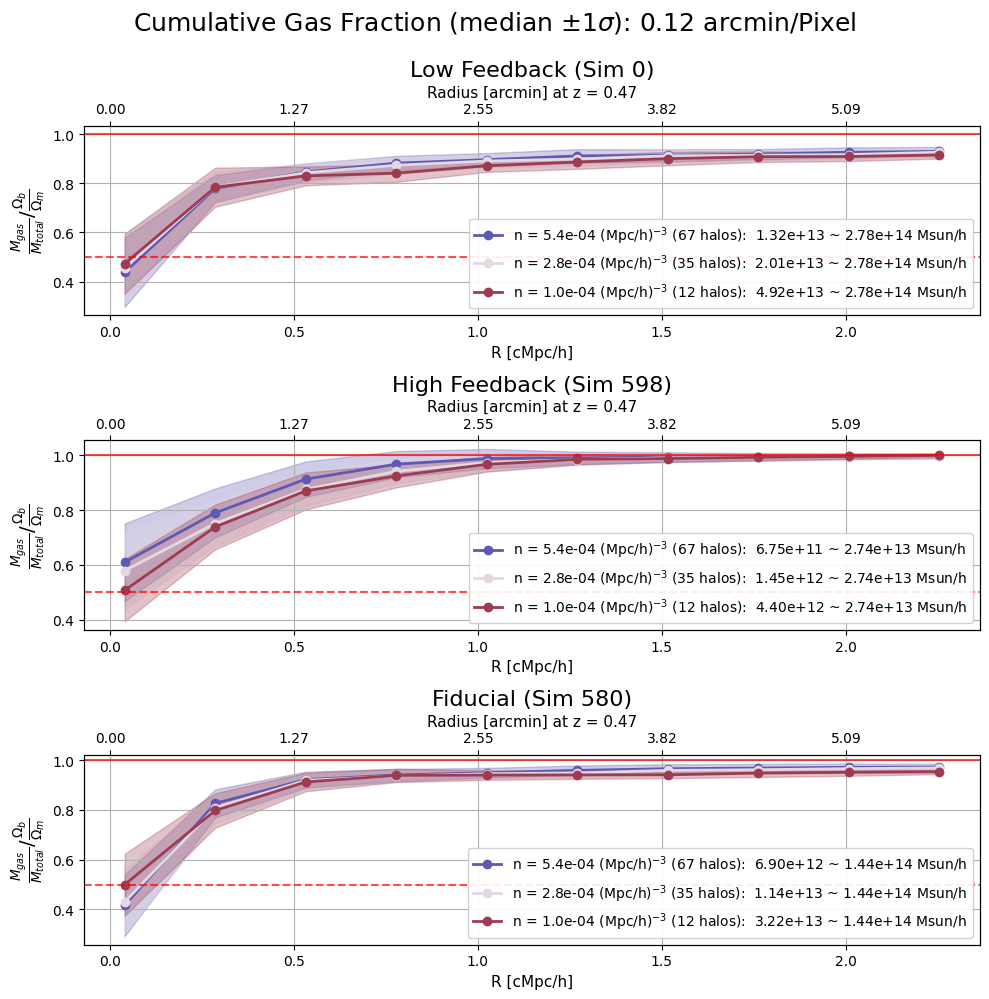

In [5]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
sys.path.append('../')
from analysis.ksz_utils import *

sims = [0, 598, 580]
k = KSZSimulator(0)
AngDis = k.AngDist(k.z)

# Note: This notebook aggregates all 1024 CAMELS simulations
# Creating 3 subplots, one for each number density
colourmap = cm.twilight_shifted
colours = colourmap(np.linspace(0.2, 0.8, 3))

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for idx, sim in enumerate(sims):
    ax = axes[idx]

    for i in range(3):
        # Plot with fill_between for uncertainty
        color = colours[i]
        cumulative_gas = cumulative_gas_abundance[i][idx]
        cumulative_total = cumulative_total_abundance[i][idx]
        fb = fb_sims[idx]
        cumulative_gas_fraction = cumulative_gas / cumulative_total / fb        
        median = np.median(cumulative_gas_fraction, axis=0)
        # upper = np.quantile(cumulative_gas_fraction, 0.25, axis=0)
        # lower = np.quantile(cumulative_gas_fraction, 0.75, axis=0)
        upper = median + np.std(cumulative_gas_fraction, axis=0)
        lower = median - np.std(cumulative_gas_fraction, axis=0)

        ax.plot(r_bins[:10], median[:10], 'o-', linewidth=2, markersize=6, color=color,
                label=mass_strings[idx][i])
        ax.fill_between(r_bins[:10], lower[:10], upper[:10], alpha=0.3, color=color)
    
    # Add horizontal reference lines
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axhline(y=1.0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)
    
    # Set labels and formatting
    ax.set_xlabel(r'R [cMpc/h]', size=11)
    ax.set_ylabel(r'$\frac{M_{gas}}{M_{total}}/\frac{\Omega_{b}}{\Omega_{m}}$', fontsize=14)
    ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
    ax.grid(True)
    if idx == 0:
        title_label = f'Low Feedback (Sim {sims[idx]})'
    elif idx == 1:
        title_label = f'High Feedback (Sim {sims[idx]})'
    else:
        title_label = f'Fiducial (Sim {sims[idx]})'    
    ax.set_title(title_label, fontsize=16)
    # Create top x-axis for arcmin
    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    theta_rad = np.arctan(ax.get_xticks() / AngDis)
    theta = np.degrees(theta_rad) * 60.
    ax3.set_xticklabels([f'{r:.2f}' for r in theta])
    ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)

fig.suptitle(r'Cumulative Gas Fraction (median $\pm 1 \sigma$): 0.12 arcmin/Pixel', fontsize=18, y=0.995)
fig.tight_layout()
plt.show()

Using nPixels=1000 for arcmin/pixel of 0.127


/tmp/ipykernel_1245370/1629317082.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_1245370/1629317082.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])
/tmp/ipykernel_1245370/1629317082.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([f'{r:.2f}' for r in theta])


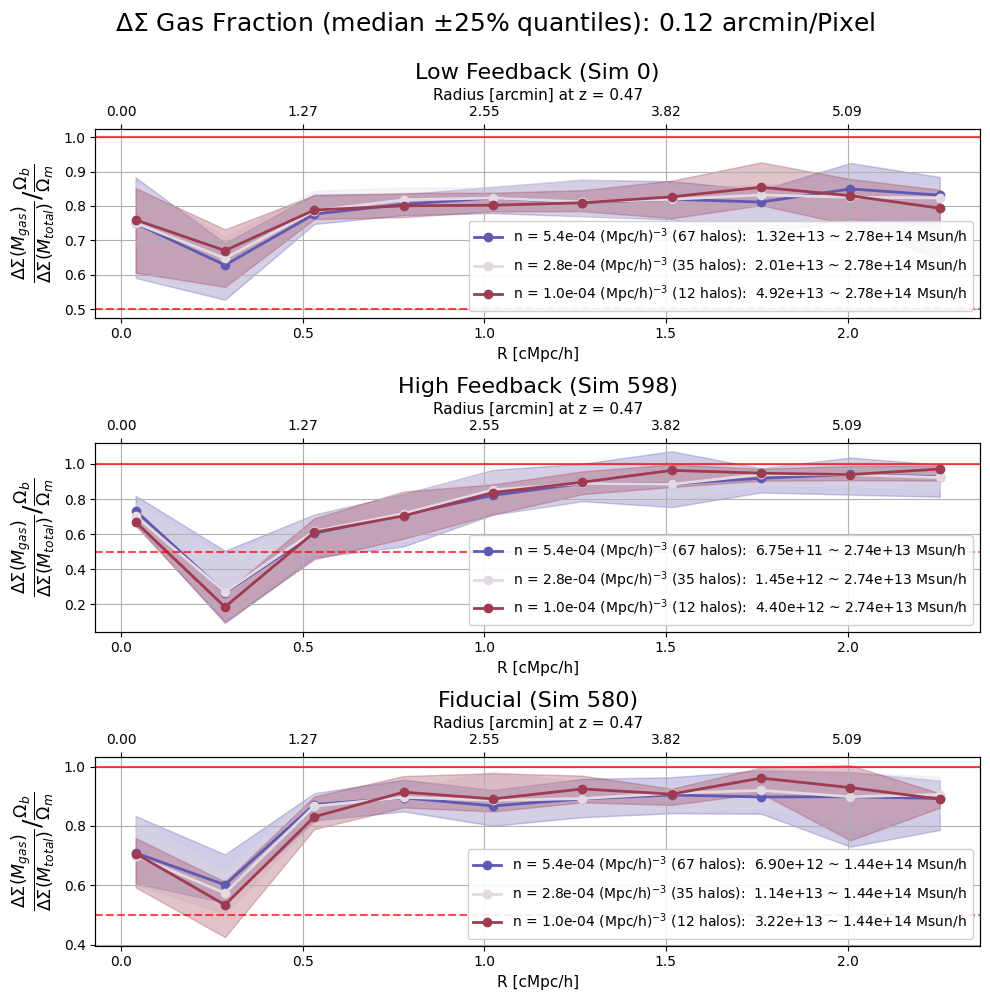

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
sys.path.append('../')
from analysis.ksz_utils import *

sims = [0, 598, 580]
k = KSZSimulator(0)
AngDis = k.AngDist(k.z)

# Note: This notebook aggregates all 1024 CAMELS simulations
# Creating 3 subplots, one for each number density
colourmap = cm.twilight_shifted
colours = colourmap(np.linspace(0.2, 0.8, 3))

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for idx, sim in enumerate(sims):
    ax = axes[idx]

    for i in range(3):
        # Plot with fill_between for uncertainty
        color = colours[i]
        gas = dS_gas_abundance[i][idx]
        total = dS_abundance[i][idx]
        fb = fb_sims[idx]
        gas_fraction = gas / total / fb        
        median = np.median(gas_fraction, axis=0)
        upper = np.quantile(gas_fraction, 0.25, axis=0)
        lower = np.quantile(gas_fraction, 0.75, axis=0)
        # upper = median + np.std(gas_fraction, axis=0)
        # lower = median - np.std(gas_fraction, axis=0)

        ax.plot(r_bins[:10], median[:10], 'o-', linewidth=2, markersize=6, color=color,
                label=mass_strings[idx][i])
        ax.fill_between(r_bins[:10], lower[:10], upper[:10], alpha=0.3, color=color)
    
    # Add horizontal reference lines
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    ax.axhline(y=1.0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)
    
    # Set labels and formatting
    ax.set_xlabel(r'R [cMpc/h]', size=11)
    ax.set_ylabel(r'$\frac{\Delta \Sigma (M_{gas})}{\Delta \Sigma (M_{total})}/\frac{\Omega_{b}}{\Omega_{m}} $', fontsize=18)
    ax.legend(loc='lower right', fontsize=10, framealpha=0.9)
    ax.grid(True)
    if idx == 0:
        title_label = f'Low Feedback (Sim {sims[idx]})'
    elif idx == 1:
        title_label = f'High Feedback (Sim {sims[idx]})'
    else:
        title_label = f'Fiducial (Sim {sims[idx]})'    
    ax.set_title(title_label, fontsize=16)
    # Create top x-axis for arcmin
    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    theta_rad = np.arctan(ax.get_xticks() / AngDis)
    theta = np.degrees(theta_rad) * 60.
    ax3.set_xticklabels([f'{r:.2f}' for r in theta])
    ax3.set_xlabel(f'Radius [arcmin] at z = 0.47', size=11)
    
    # ax.set_ylim([0, 1.2])


fig.suptitle(r'$\Delta \Sigma$ Gas Fraction (median $\pm 25\%$ quantiles): 0.12 arcmin/Pixel', fontsize=18, y=0.995)
fig.tight_layout()
plt.show()